## PowerSpec diags

- An example how to use PowerSpec (from AJ) to compute and plot a space power spectrum from MEDWEST60 ensemble simulations 
(on SSH)
- What it does: 
    * spectrum at several timesteps averaged over 19 members (2-20)
    * spectrum of the difference of members with mb #1 at several timesteps averaged over members 2-19.
    * plot and save psd data

- Left to do:
    * average also over a few timesteps: like 24 or 48 hrs around date or so.

# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# custom tools
import lib_medwest60 as slx

%matplotlib inline 

In [2]:
# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
import sys
sys.path.insert(0,'/linkhome/rech/genige01/regi915/PYGIT/powerspec/powerspec')
import powerspec as ps
#import Plot_PowerSpec as pp

## Read data (ensemble experiments)

In [3]:
varna="sossheig"
typ="gridT-2D"
naexp="STD1%"
CONFIGCASE='MEDWEST60-GSL14'
ens='ens01'
machine='JZ'
NMBtot=20

nav_lat_ref,nav_lon_ref,mask,ssh00,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=NMBtot,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
ssh00.attrs['experiment_short_name'] =  naexp
maskmap = mask.isel(z=0).squeeze()
maskref=maskmap

#diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'
diro='/gpfswork/rech/egi/regi915/DIAGS/'

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
003MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
004MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
005MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
006MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
007MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
008MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
009MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
010MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
011MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
012MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
013MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
014MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
015MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
016MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
017MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
018MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
019MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/
020MEDWEST60-GSL14-ens01_1h_*gridT-2D_*.nc


/gpfs7kw/linkhome/rech/genige01/regi915/NBJPY_MEDWEST60_slx/MEDWEST60/NOTEBOOKS/lib_medwest60.py:71: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  data   = xr.open_mfdataset(dirimed+filiprefix+"*.nc",concat_dim='time_counter',decode_times=True)[varna]
/gpfslocalsup/pub/anaconda-py3/2019.10/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the da

## Define 4 regions of 200x200 gridpoints
See maps below

In [4]:
#region=[400,600,210,410]
Lregion=[454,804,176,526]

region1=[400,600,210,410]

region2=[600,800,410,610]

region3=[600,800,180,380]

## Plot SSH map at day +30 and plot regions.

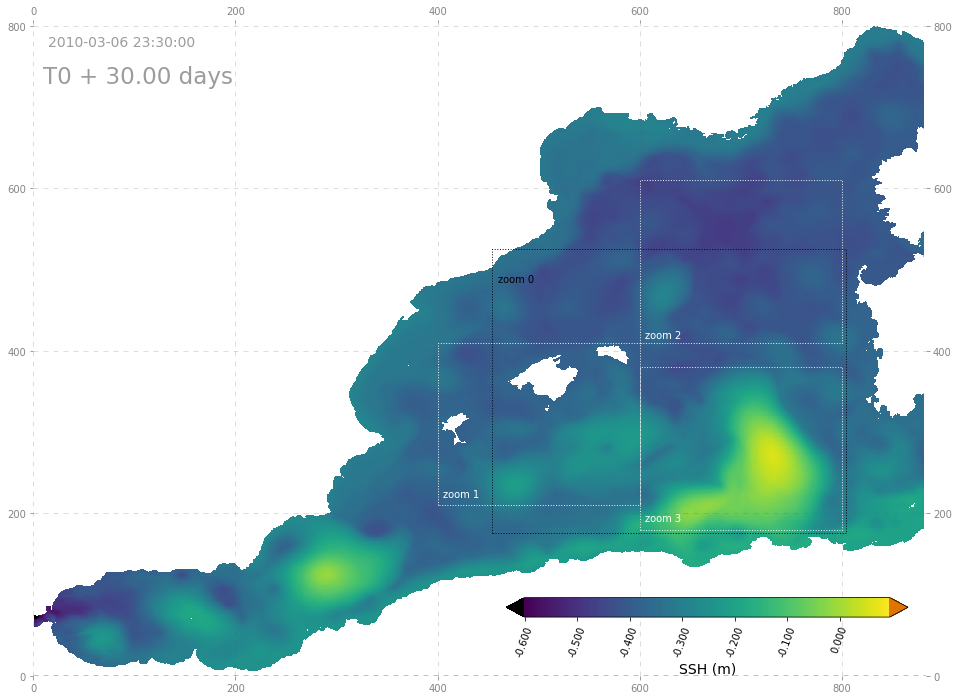

In [5]:
gstyle='lightstyle'
varname='SSH'
latexvarname=slx.flatexvarname(varna)[1]
plto = varname+"_"+CONFIGCASE+"-"+ens+"ssh"    


#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):  
#for it in range(100,359,6): 
    #====================================
    # data to plot 
    tdate=ssh00.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    
    # multiplicating factor
    fac=1

    if fac==1e3:
        faclabel='1e3'
        faclabelinv='10$^{-3}$'

    if fac==1:
        faclabel='1'
        faclabelinv=''

    if fac==1e2:
        faclabel='1e2'
        faclabelinv='10$^{-2}$'
        
    data2plot = ssh00.isel(time_counter=it,e=0).squeeze().where(maskmap>0).to_masked_array()
    data2plot = data2plot*fac                 
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-0.6,0.1,0.005]
    
    # customed colormap
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='#DF7401')
    #cmocean.cm.thermal_r


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    #cs2   = ax.pcolormesh(data2plot2,cmap=cmap2,norm=norm2)
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel=latexvarname+slx.textunitfac(varname,faclabelinv)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=20,tformat="%.3f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
    showzoomL=True
    if showzoomL:
        region=Lregion
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='k', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 0",xy=(460,485),xycoords='data', color="k",size=10)

    showzoom3=True
    if showzoom3:
        region=region3
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 3",xy=(605,190),xycoords='data', color="w",size=10)

    showzoom2=True
    if showzoom2:
        region=region2
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 2",xy=(605,415),xycoords='data', color="w",size=10)

    showzoom1=True
    if showzoom1:
        region=region1
        xbox=[region[0],region[0],region[1],region[1],region[0]]
        ybox=[region[2],region[3],region[3],region[2],region[2]]
        ax.plot(xbox, ybox, color='w', alpha=0.9,linewidth=1, linestyle=":",solid_capstyle='round', zorder=2)
        ax.annotate("zoom 1",xy=(405,220),xycoords='data', color="w",size=10)
        
        
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)

## Compute and plot power spectrum

* Select a (predefined) region

In [5]:
region=Lregion
#region=region2
reg='region0'
sshensreg = ssh00.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
maskreg = maskref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))

# spectrum of all members at several time step 

at 0, 5 10 15 20 25 30 days 

--------0
--------119
--------239
--------359
--------479
--------599
--------719


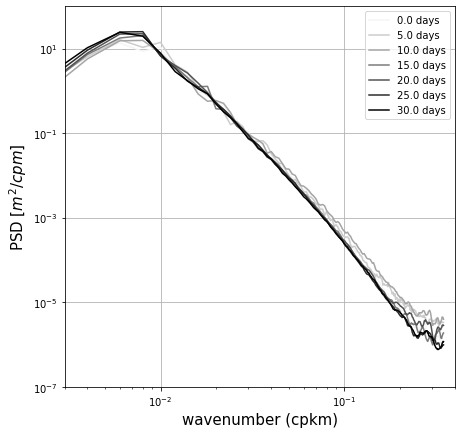

In [11]:

plto='pltSP_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300

icount=-1
for itt in range(0,721,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshensreg[1:,it,:,:].where(maskreg>0).squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    

    if icount==0:
        allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')

 
    co=((720-it)/750., (720-it)/750., (720-it)/750.)
    plt.loglog(1E3*wavenumber,psd,color=co,label=str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'dataSP_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd"
    dataprint.to_netcdf(outfi,mode='w')

        

## Spectra using $\Delta$time (in hours) x 20 mbs stacked

In [13]:
1322/(24*5)

11.016666666666667

--------0
--------119
--------239
--------359
--------479
--------599
--------719
--------839
--------959
--------1079
--------1199
--------1319


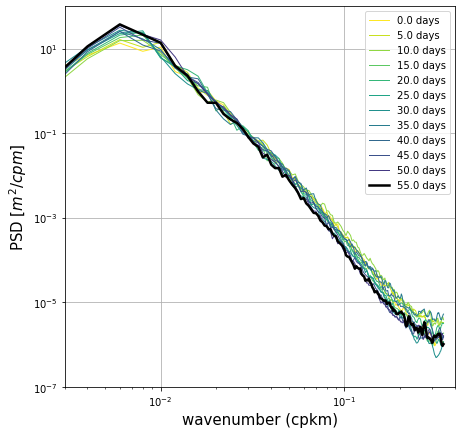

In [26]:
DT=1
dpifig=300
#========= Plot settings ===============
levbounds=[0,11+2,1]

# customed colormap
cmap,norm = slx.mycolormap(levbounds,cm_base='viridis_r',cu='y',co='#DF7401')
#cmocean.cm.thermal_r


for im in range(0,1):
    plto='pltSP60_DT'+str(DT)+'_m'+str(im+1)+'_'+CONFIGCASE+'-'+ens+'_'+reg


    icount=-1
    for itt in range(0,1322,24*5):
        it =itt-1
        if it<0:
            it=0
        icount = icount+1
        print('--------'+str(it))
        # - compute daily spectra then computer average
        _psd = []
        if DT>1:
            pressh = sshensreg[im,it:it+DT,:,:].where(maskreg>0).squeeze()
        else:
            pressh = sshensreg[im,it:it+DT,:,:].where(maskreg>0) #.squeeze()

        if len(pressh.shape)==4:
            kTOT=(pressh.shape[0]+pressh.shape[1])
            ssh=pressh.stack(et=('e', 'time_counter'))

        if len(pressh.shape)<=3:
            kTOT=len(pressh)
            ssh=pressh

        for k in range(kTOT):
            if len(pressh.shape)==4:
                wavenumber,psd_ = ps.wavenumber_spectra(ssh.isel(et=k).to_masked_array(),nav_lon.values,nav_lat.values)
            else:
                wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)       
            _psd.append(psd_)

        psd = np.array(_psd).mean(axis=0)

        if icount==0:
            allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
            fig3 = plt.figure(figsize=([7,7]),facecolor='white')

        else:
            xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
            allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')


        #co=((720-it)/721., (720-it)/721., (720-it)/721.)
        #co=((1440-it)/1441., (1440-it)/1441., (1440-it)/1441.)
        co=cmap.colors[icount]
        lw=1
        if icount==11:
            co='k'
            lw=2.5
        if (DT>1):
            plt.loglog(1E3*wavenumber,psd,color=co,linewidth=lw,label=str((itt+(DT/2.))/24.)+" days")
        else:
            plt.loglog(1E3*wavenumber,psd,color=co,linewidth=lw,label=str(itt/24.)+" days")

    plt.xlim(3e-3,4e-1)
    plt.ylim(1e-7,1e2)
    plt.xlabel('wavenumber (cpkm)',fontsize=15)
    plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
    plt.grid(True)   
    plt.legend()
    plt.show()


    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,plto,dpifig=300)

    savedata=False
    if savedata:
        dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

        outfi = diro+'dataSP24_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

        dataprint.name = 'psd'
        dataprint.attrs['long_name'] =  "psd"
        dataprint.to_netcdf(outfi,mode='w')

        

# all members

--------0
--------239
--------479
--------719
--------959
--------1199
--------1439


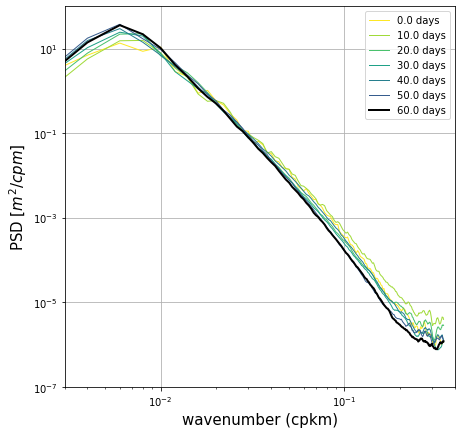

In [47]:

dpifig=300

levbounds=[0,6+2,1]
cmap,norm = slx.mycolormap(levbounds,cm_base='viridis_r',cu='k',co='#DF7401')


#for im in range(0,20):
    #plto='pltSP60_DT1+_m'+str(im+1)+'_'+CONFIGCASE+'-'+ens+'_'+reg
plto='pltSP60_DT1_allmbs_'+CONFIGCASE+'-'+ens+'_'+reg


icount=-1
for itt in range(0,1442,24*10):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    pressh = sshensreg[:,it:it+1,:,:].where(maskreg>0).squeeze()

    if len(pressh.shape)==4:
        kTOT=(pressh.shape[0]+pressh.shape[1])
        ssh=pressh.stack(et=('e', 'time_counter'))

    if len(pressh.shape)<=3:
        kTOT=len(pressh)
        ssh=pressh

    for k in range(kTOT):
        if len(pressh.shape)==4:
            wavenumber,psd_ = ps.wavenumber_spectra(ssh.isel(et=k).to_masked_array(),nav_lon.values,nav_lat.values)
        else:
            wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)       
        _psd.append(psd_)

    psd = np.array(_psd).mean(axis=0)

    if icount==0:
        allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')

    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')


    #co=((720-it)/721., (720-it)/721., (720-it)/721.)
    #co=((1440-it)/1441., (1440-it)/1441., (1440-it)/1441.)
    co=cmap.colors[icount]
    lw=1
    if icount==6:
        co='k'
        lw=2
    plt.loglog(1E3*wavenumber,psd,color=co,linewidth=lw,label=str((itt+0)/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)

savedata=False
if savedata:
    dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'dataSP24_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd"
    dataprint.to_netcdf(outfi,mode='w')

        

In [42]:

plto='pltSP_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300

icount=-1
for ie in range(0,20):

    #icount=-1
    #for itt in range(0,721,24*5):
    for itt in range(720,721,24*5):
        it =itt-1
        if it<0:
            it=0
        icount = icount+1
        print('--------'+str(it))
        # - compute daily spectra then computer average
        _psd = []
        ssh=sshensreg[ie,it-47:it,:,:].where(maskreg>0).squeeze()

        for k in range(len(ssh)):
            wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
            _psd.append(psd_)
        psd = np.array(_psd).mean(axis=0)


        if icount==0:
            allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
            fig3 = plt.figure(figsize=([7,7]),facecolor='white')

        else:
            xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
            allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')


        co=((720-it)/750., (720-it)/750., (720-it)/750.)
        plt.loglog(1E3*wavenumber,psd,color=co,label=str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)

savedata=False
if savedata:
    dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'dataSP_'+CONFIGCASE+'-'+ens+'_'+reg+'_mb'+str(ie)+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd"
    dataprint.to_netcdf(outfi,mode='w')

        

--------719


KeyboardInterrupt: 

## for 60 days

--------0
--------119
--------239
--------359
--------479
--------599
--------719
--------839
--------959
--------1079
--------1199
--------1319
--------1439


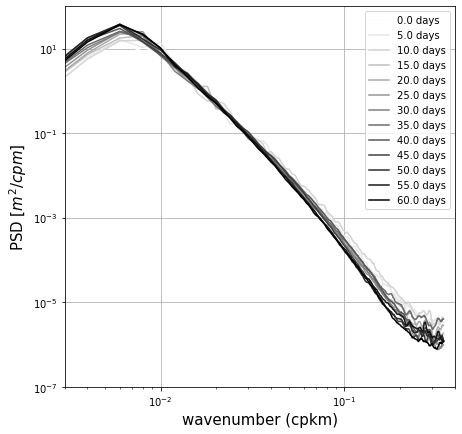

In [19]:

plto='plt60dSP_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300

icount=-1
for itt in range(0,1441,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshensreg[1:,it,:,:].where(maskreg>0).squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    

    if icount==0:
        allpsd = xr.DataArray(psd,dims=('wn'),name='psd')
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')

 
    co=((1440-it)/1450., (1440-it)/1450., (1440-it)/1450.)
    plt.loglog(1E3*wavenumber,psd,color=co,label=str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30,35,40,45,50,55,60]})

    outfi = diro+'data60dSP_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd"
    dataprint.to_netcdf(outfi,mode='w')

        

# sp diff

Compute the difference of all members to member 1.

Then compute the psd of the diff at different times.

And plot and save.

In [20]:
sshdiff = sshensreg-sshensreg.isel(e=0)
#sshdiff.load()

In [8]:
sshdiff

<xarray.DataArray 'sossheig' (e: 20, time_counter: 1440, y: 200, x: 200)>
dask.array<sub, shape=(20, 1440, 200, 200), dtype=float32, chunksize=(1, 24, 200, 200), chunktype=numpy.ndarray>
Coordinates:
    nav_lon       (y, x) float32 4.3915377 4.408246 ... 7.8021855 7.8189116
    nav_lat       (y, x) float32 37.247757 37.24743 ... 39.63078 39.630264
  * time_counter  (time_counter) datetime64[ns] 2010-02-05T00:30:00 ... 2010-04-05T23:30:00
Dimensions without coordinates: e, y, x

--------0
--------119
--------239
--------359
--------479
--------599
--------719


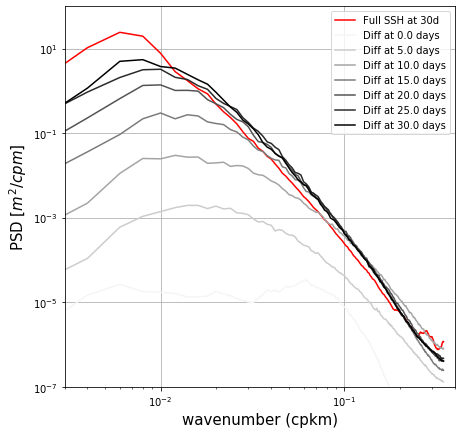

In [18]:

plto='pltSPdiff_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300


icount=-1
for itt in range(0,721,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshdiff[1:,it,:,:].where(maskreg>0) #.squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    if icount==0:
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        plt.loglog(1E3*wavenumber,allpsd[6,:],color='r',label="Full SSH at 30d")
        allpsd_diff = xr.DataArray(psd,dims=('wn'),name='psd')
        
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd_diff = xr.concat([allpsd_diff,xrpsd], dim='time_counter')
       

 
    co=((720-it)/750., (720-it)/750., (720-it)/750.)
    plt.loglog(1E3*wavenumber,psd,color=co,label="Diff at "+str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)
        

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd_diff.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30]})

    outfi = diro+'dataSPdiff_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd_of_difference"
    dataprint.to_netcdf(outfi,mode='w')


# plot for 60 days

--------0
--------119
--------239
--------359
--------479
--------599
--------719
--------839
--------959
--------1079
--------1199
--------1319
--------1439


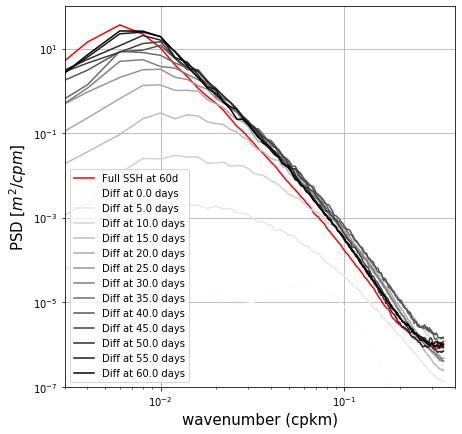

In [21]:

plto='plt60SPdiff_'+CONFIGCASE+'-'+ens+'_'+reg
dpifig=300


icount=-1
for itt in range(0,1441,24*5):
    it =itt-1
    if it<0:
        it=0
    icount = icount+1
    print('--------'+str(it))
    # - compute daily spectra then computer average
    _psd = []
    ssh=sshdiff[1:,it,:,:].where(maskreg>0) #.squeeze()
    
    for k in range(len(ssh)):
        wavenumber,psd_ = ps.wavenumber_spectra(ssh[k].to_masked_array(),nav_lon.values,nav_lat.values)
        _psd.append(psd_)
    psd = np.array(_psd).mean(axis=0)
    if icount==0:
        fig3 = plt.figure(figsize=([7,7]),facecolor='white')
        plt.loglog(1E3*wavenumber,allpsd[12,:],color='r',label="Full SSH at 60d")
        allpsd_diff = xr.DataArray(psd,dims=('wn'),name='psd')
        
        
    else:
        xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
        allpsd_diff = xr.concat([allpsd_diff,xrpsd], dim='time_counter')
       

 
    co=((1440-it)/1450., (1440-it)/1450., (1440-it)/1450.)
    plt.loglog(1E3*wavenumber,psd,color=co,label="Diff at "+str(itt/24.)+" days")

plt.xlim(3e-3,4e-1)
plt.ylim(1e-7,1e2)
plt.xlabel('wavenumber (cpkm)',fontsize=15)
plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
plt.grid(True)   
plt.legend()
plt.show()


# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,plto,dpifig=300)
        

savedata=True
if savedata:
    dataprint = xr.DataArray(allpsd_diff.values, dims=('time_counter', 'wn'),coords={'time_counter':[0,5,10,15,20,25,30,35,40,45,50,55,60]})

    outfi = diro+'data60SPdiff_'+CONFIGCASE+'-'+ens+'_'+reg+'.nc'

    dataprint.name = 'psd'
    dataprint.attrs['long_name'] =  "psd_of_difference"
    dataprint.to_netcdf(outfi,mode='w')


---

## Test of the interp function over Balearic islands

* select the region (200x200)

In [43]:
region=region1
sshensreg = ssh00.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))

* Interpolate like done in powerspec

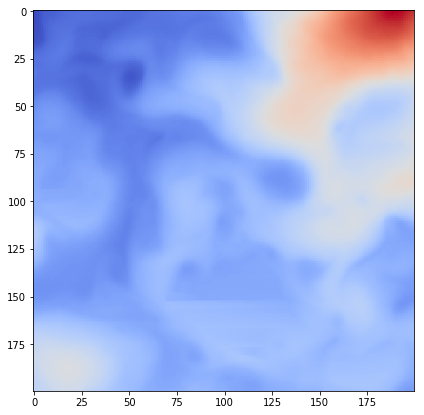

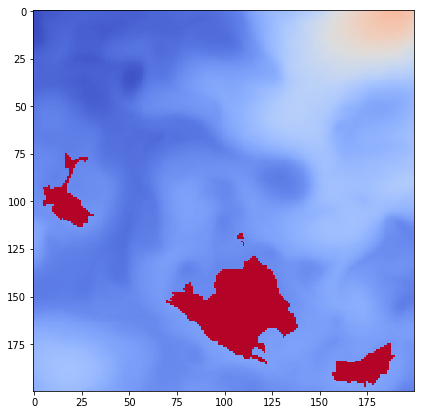

In [44]:
ssh=sshensreg[0,:,:,:]
x,y,data = ps.interpolate(ssh[0].where(ssh[0]!=0).to_masked_array(),nav_lon.values,nav_lat.values) 

data = ps.isdata_contain_nan(data)

fig = plt.figure(figsize=(7,7))
plt.imshow(data,cmap='coolwarm')
plt.show()
fig = plt.figure(figsize=(7,7))
plt.imshow(ssh[0],cmap='coolwarm')
plt.show()

# test if nan data that should not be

In [ ]:
ssh = sshensreg[14,1319,:,:].where(maskreg>0)
ssh
for ie in range(1,20):
    ssh=sshensreg[ie,1319,:,:].where(maskreg>0,10.)
    print('--- '+str(ie))
    print(np.isnan(ssh).any().values)
    

---